## Wine Quality Prediction

### Importing libraries

In [84]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


### Main chemistry features

* **fixed acidity** – Non-volatile acids in the wine (like tartaric acid) that don’t easily evaporate and give the wine its basic sour/tart taste, measured in grams per liter.
* **volatile acidity** – Mainly acetic acid (vinegar-like acid) that can evaporate; if too high, the wine can smell or taste like vinegar or nail polish remover.
* **citric acid** – A natural acid that can add freshness and “brightness” to the wine; small amounts are common, very high or zero values may affect taste and style.
* **Residual sugar** – The amount of sugar left in the wine after fermentation; higher values usually mean the wine tastes sweeter.
* **Chlorides** – Mostly common salt content in the wine; very high values can give salty or unpleasant taste.

### Sulfur dioxide and preservation
* **free sulfur dioxide** – The part of SO₂ that is active and protects wine from microbes and oxidation; too little → spoilage risk, too much → sharp smell.
* **total sulfur dioxide** – All SO₂ in the wine (free + bound); used to monitor preservative level and legal limits.

### Other physical properties
* **density** – How heavy the wine is compared to water; depends mainly on alcohol and sugar (more sugar → higher density, more alcohol → lower density).
* **pH** – Overall acidity scale (lower pH = more acidic); wine usually around 2.7–4.0.
* **sulphates** – Sulfate salts that can act as a preservative and affect structure; often related to how protected the wine is from oxidation.
* **alcohol** – Percentage of alcohol by volume; higher alcohol often gives a warmer, fuller mouthfeel.

### Target/output
* **quality** – Human expert score for the wine, usually an integer from 0–10 (in this dataset typically 3–9).


### Data Collection

In [85]:
#loading the dataset
wine_df = pd.read_csv("winequality-red.csv")

In [86]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Data Information

In [87]:
wine_df.shape

(1599, 12)

In [88]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [89]:
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


### Missing Values

In [90]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Visulization & Plot

In [91]:
#renaming columns for better understanding 
wine_df.rename(columns = {"fixed acidity":"fixed_acidity",
                          "volatile acidity":"volatile_acidity",
                          "citric acid":"citric_acid",
                          "residual sugar":"residual_sugar",
                          "chlorides":"chlorides",
                          "free sulfur dioxide":"free_sulfur_dioxide",
                          "total sulfur dioxide":"total_sulfur_dioxide",
                          "density":"density",
                          "pH":"pH",
                          "sulphates":"sulphates",	
                          "alcohol":"alcohol",	
                          "quality":"quality"
                         },
               inplace = True)
                           

In [92]:
#creating a list of dataframe columns
columns = list(wine_df.columns)

In [93]:
#Target Value
wine_df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

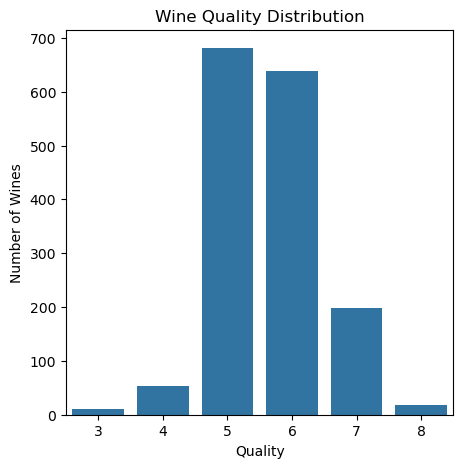

In [94]:
wine_quality = wine_df['quality'].value_counts().sort_index()
plt.figure(figsize=(5,5))
sns.barplot(x = wine_quality.index, 
            y = wine_quality.values)
plt.title("Wine Quality Distribution")
plt.ylabel("Number of Wines")
plt.xlabel("Quality")
plt.show()

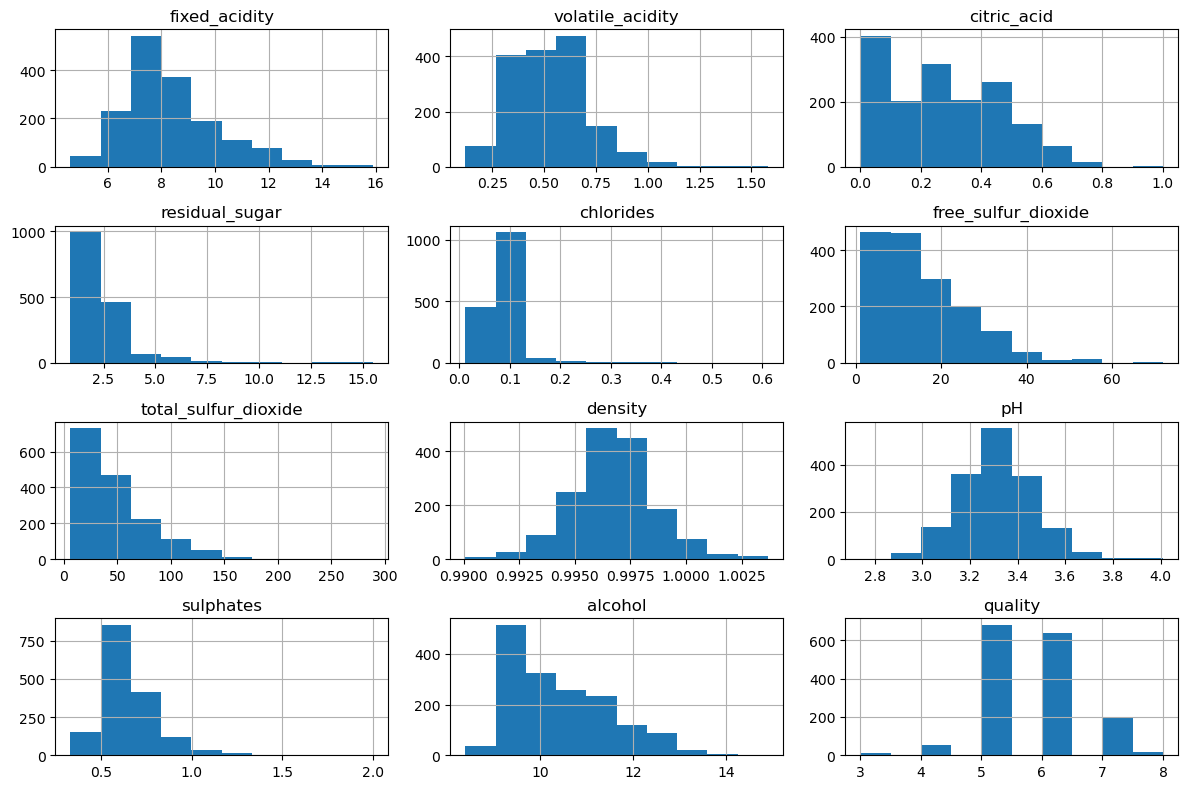

In [95]:
wine_df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

### Relationship between features and wine quality

<Figure size 1000x600 with 0 Axes>

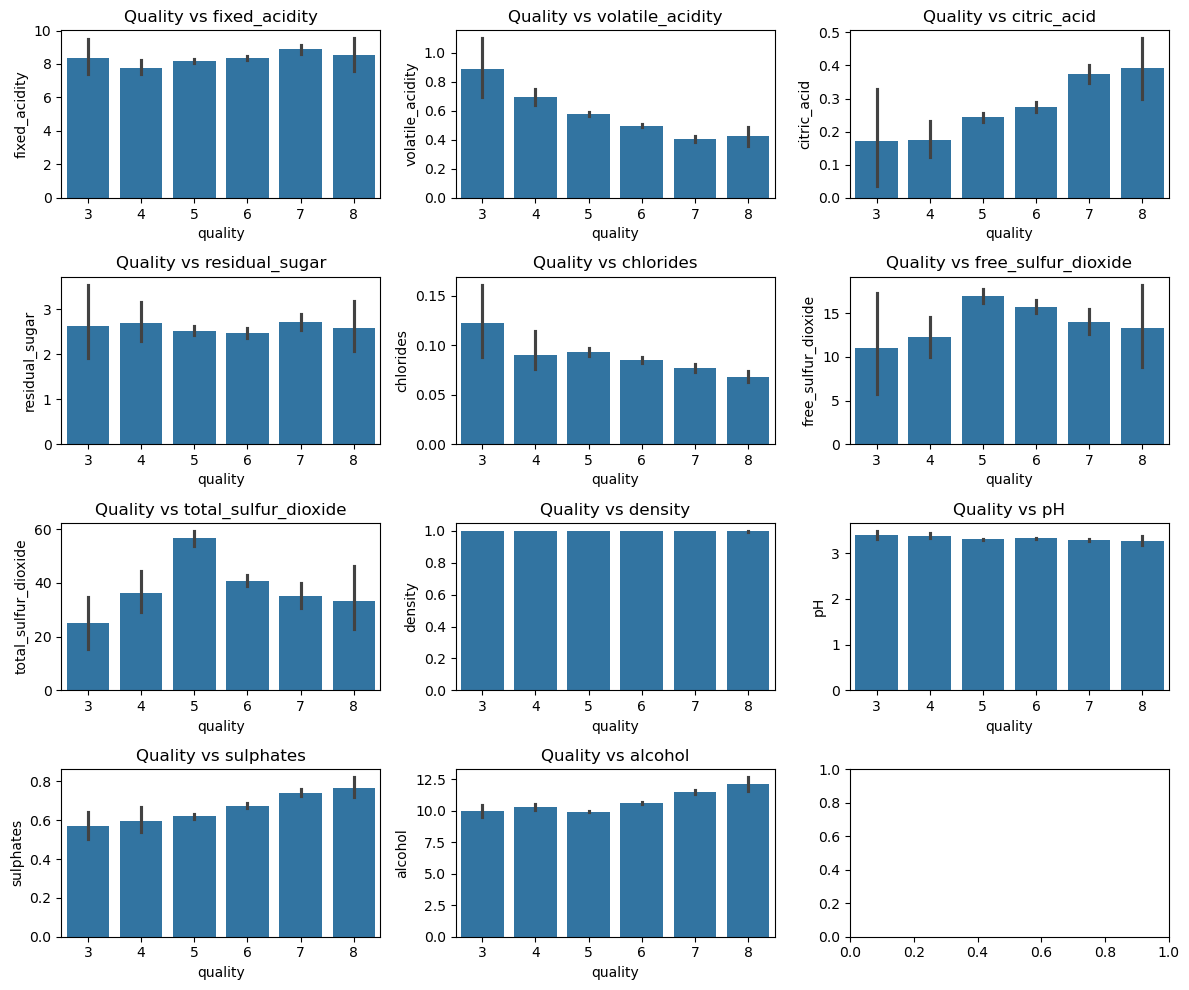

In [96]:
fig = plt.figure(figsize = (10,6))

# creating list of columns except the target value which is quality
features = [ col for col in wine_df.columns if col != 'quality' ]

# creating a grid for all features columns
num_row = 4
num_col = 3
fig , axes = plt.subplots(num_row , num_col, figsize=(12,10))

#taking the feature index i and converting into rows and columns
for i, feature in enumerate(features):
    row = i // num_col
    col = i % num_col

    sns.barplot(x = 'quality',y = feature ,data = wine_df,ax=axes[row ,col])
    axes[row, col].set_title(f'Quality vs {feature}')

plt.tight_layout()
plt.show()





The bar plots above show how the mean value of each chemical feature changes across wine quality scores.

- **Alcohol**: There is a clear upward trend; higher–quality wines (7–8) have noticeably higher average alcohol content than lower–quality wines (3–5). This suggests a positive association between alcohol level and perceived quality.  
- **Sulphates and citric_acid**: Both tend to increase with quality. Higher–quality wines generally show higher mean sulphates and citric_acid, indicating that these features may contribute positively to wine structure and flavour.  
- **Volatile_acidity and chlorides**: These features decrease as quality increases. Low–quality wines have higher volatile_acidity and chlorides, while good wines show lower averages, suggesting a negative relationship with quality.  
- **Other features (fixed_acidity, residual_sugar, free_sulfur_dioxide, total_sulfur_dioxide, density, pH)**: Their mean values change only slightly across quality levels, and the patterns are not strictly increasing or decreasing. These variables may still be useful in combination with others, but individually they show weaker or less clear trends with quality.

Overall, alcohol, sulphates, and citric_acid appear positively related to wine quality, while volatile_acidity and chlorides are negatively related. The remaining features show weaker or mixed relationships.


### Correlation between different columns

In [97]:
# Heatmap to understand the correlation between columns 
correlation = wine_df.corr()

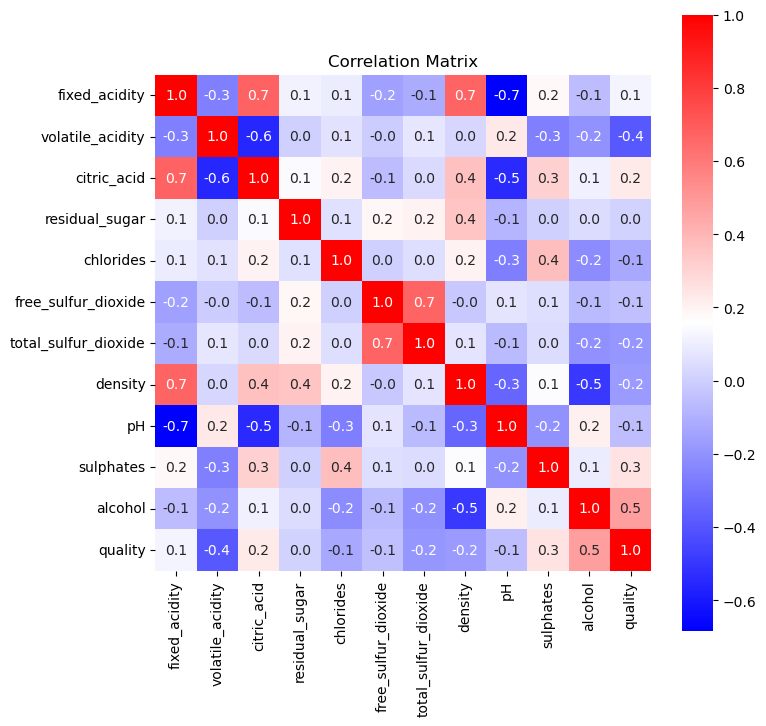

In [98]:

plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt ='.1f', annot = True, cmap = 'bwr') #fmt = 1.f for 1 floating points 
plt.title('Correlation Matrix')
plt.show()



The heatmap shows the pairwise Pearson correlation coefficients between all chemical features.

- **Strong positive correlations between features**:  
  - `fixed_acidity` is strongly positively correlated with `citric_acid` and `density`, indicating that wines with higher fixed acidity tend to have higher citric acid and higher density.  
  - `free_sulfur_dioxide` and `total_sulfur_dioxide` are also highly correlated, which is expected because total SO₂ includes the free fraction.

- **Features positively related to quality**:  
  - `alcohol` shows a clear positive correlation with `quality`, supporting the earlier plots where higher–quality wines had higher alcohol content.  
  - `sulphates` and `citric_acid` have weaker but still positive correlations with `quality`, suggesting they may contribute to better–rated wines.

- **Features negatively related to quality**:  
  - `volatile_acidity` is negatively correlated with `quality`, meaning wines with higher volatile acidity tend to receive lower quality scores.  
  - `chlorides` and `density` also show weak negative correlations with `quality`, indicating that higher salt content and higher density are slightly associated with lower quality.


### Data Preprocessing 

In [99]:
X = wine_df.drop('quality',axis=1)

In [100]:
print(X)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free_sulfur_dioxide  

In [101]:
#Creating function to categorize the value into 1 and 0
def categorize_quality(qualities):
    if qualities >= 6:
        return 1
    else:
        return 0

Y = wine_df['quality'].apply(categorize_quality)

In [102]:
print(Y)

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64


### Train And Test Split

In [103]:
# In here we are spliting the data into 2 parts X & Y and the train test ratio size 80-20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2)

In [104]:
print(Y.shape , Y_test.shape, Y_train.shape)

(1599,) (320,) (1279,)


## Model Training
### Random Forest Classifier 

In [105]:
model = RandomForestClassifier(
    n_estimators = 100,  # numbmer of trees 
    random_state = 40,   # Reproducibility
    max_depth = 20       # prevents overfitting 
)

In [106]:
model.fit(X_train, Y_train)


RandomForestClassifier(max_depth=20, random_state=40)

### Model Evaluation
### Accuracy Score

In [107]:
X_test_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)

In [108]:
print(f"Accuracy: {test_data_accuracy}")

Accuracy: 0.8


### "PRECISION | RECALL | F1-SCORE"

In [110]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#prediction on test data
y_pred = model.predict(X_test)

#accuracy
acc = accuracy_score(Y_test,y_pred)
print(f"accuracy :",acc)

#precision, recall, F1 for each cell
print("\nClassification Report:\n")
print(classification_report(Y_test, y_pred))



accuracy : 0.8

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       132
           1       0.84      0.81      0.83       188

    accuracy                           0.80       320
   macro avg       0.79      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



### Confusion Matrix

[[104  28]
 [ 36 152]]

                     Predictive Balanced  Predictive Outstanding
Actual Balanced                     104                      28
Actual Outstanding                   36                     152


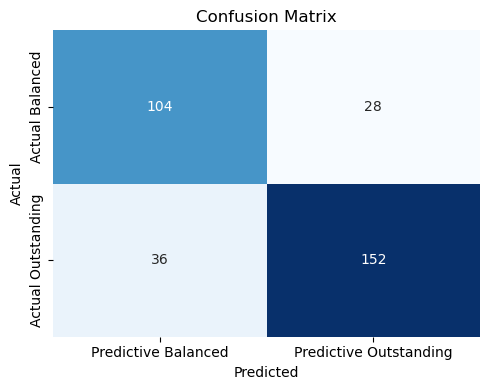

In [111]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)

cm_df = pd.DataFrame(cm, 
                     index=["Actual Balanced", "Actual Outstanding"], 
                     columns=["Predictive Balanced", "Predictive Outstanding"])
print("\n", cm_df)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


### Random Forest Classifier 
The **Random Forest Classifier** achieved an overall **accuracy of 80%** on the test set. While this is a strong result, a deeper dive into the metrics reveals how the model is actually making decisions:

#### 1. Class Imbalance & Model Bias
The model shows a slight bias toward the "Outstanding" category. This is likely because the dataset is somewhat imbalanced:
* **Outstanding (Class 1):** 188 samples
* **Balanced (Class 0):** 132 samples

Because the model had more "practice" with the Outstanding wines, it achieved a higher **F1-Score (0.83)** for that class compared to Balanced wines (**0.76**).

#### 2. Error Analysis (Confusion Matrix)
Looking at the Confusion Matrix, we can see exactly where the model is stumbling:
* **False Negatives (36):** The model incorrectly labeled 36 "Outstanding" wines as "Balanced."
* **False Positives (28):** The model incorrectly labeled 28 "Balanced" wines as "Outstanding."

#### 3. Final Verdict
The model is quite reliable, especially at identifying high-quality wines.

## Model Training
### Logestic Regression

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
log_model = LogisticRegression(
    max_iter=1000, 
    random_state=42
)

In [114]:
log_model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000, random_state=42)

### Model Evaluation

In [115]:
# prediction
train_pred = log_model.predict(X_train)
test_pred = log_model.predict(X_test)

In [116]:
print("LOGISTIC REGRESSION - ACCURACY")
print(f"Training Accuracy: {accuracy_score(Y_train, train_pred):.2f}")
print(f"Testing Accuracy:  {accuracy_score(Y_test, test_pred):.2f}")

LOGISTIC REGRESSION - ACCURACY
Training Accuracy: 0.75
Testing Accuracy:  0.74


### "PRECISION | RECALL | F1-SCORE"

In [117]:
print("PRECISION | RECALL | F1-SCORE")
print(classification_report(Y_test, test_pred, 
                           target_names=["Balanced", "Outstanding"]))

PRECISION | RECALL | F1-SCORE
              precision    recall  f1-score   support

    Balanced       0.66      0.76      0.70       132
 Outstanding       0.81      0.72      0.76       188

    accuracy                           0.74       320
   macro avg       0.73      0.74      0.73       320
weighted avg       0.75      0.74      0.74       320



                    Pred Balanced  Pred Outstanding
Actual Balanced               100                32
Actual Outstanding             52               136


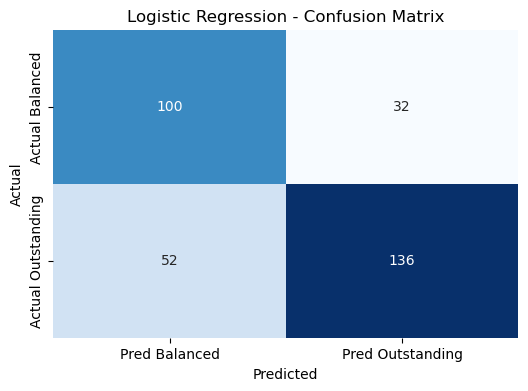

In [118]:
cm = confusion_matrix(Y_test, test_pred)
cm_df = pd.DataFrame(cm,
                     index=["Actual Balanced", "Actual Outstanding"],
                     columns=["Pred Balanced", "Pred Outstanding"])
print(cm_df)

plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Logistic Regression - Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

### Logistic Regression Analysis

The **Logistic Regression** model provides a solid baseline, yielding a **74% accuracy** on the test set. While reliable, it shows a clear gap in performance compared to the Random Forest.

#### 1. Class Performance & Imbalance
The model is notably more effective at identifying "Outstanding" wines than "Balanced" ones. This is expected given the higher number of Outstanding samples (188) compared to Balanced samples (132) in the test data:
* **Outstanding (Class 1):** Achieved an **F1-score of 0.76**.
* **Balanced (Class 0):** Achieved an **F1-score of 0.70**.

#### 2. Error Analysis (Confusion Matrix)
The confusion matrix reveals where the linear boundaries of Logistic Regression struggle:
* **False Negatives (52):** The model incorrectly classified 52 "Outstanding" wines as "Balanced".
* **False Positives (32):** The model incorrectly classified 32 "Balanced" wines as "Outstanding".


#### 3. Final Verdict
With a training accuracy of **75%** and a testing accuracy of **74%**, the model is well-generalized and not overfitting. However, the higher error rate in the confusion matrix suggest that a non-linear model, like the Random Forest, is better suited to capture the complexities of wine quality.

## Model Training
### Support Vectore Machine

In [119]:
from sklearn.svm import SVC

In [120]:
svm_model = SVC(kernel = 'linear', C=1.0)
svm_rbf = SVC(kernel = 'rbf', C =1.0)

In [121]:
svm_model.fit(X_train,Y_train)
svm_rbf.fit(X_train,Y_train)

SVC()

### Model Evaluation

In [122]:
print(f"Linear SVM Test Accuracy: {svm_model.score(X_test, Y_test):.2%}")
print(f"RBF SVM Test Accuracy: {svm_rbf.score(X_test, Y_test):.2%}")


Linear SVM Test Accuracy: 72.19%
RBF SVM Test Accuracy: 65.62%


### "PRECISION | RECALL | F1-SCORE"

In [123]:
y_pred_linear = svm_model.predict(X_test)

print("\nClassification Report :")
print(classification_report(Y_test,y_pred_linear,
                           target_names=['Balanced','Outstanding']))


Classification Report :
              precision    recall  f1-score   support

    Balanced       0.64      0.77      0.69       132
 Outstanding       0.81      0.69      0.74       188

    accuracy                           0.72       320
   macro avg       0.72      0.73      0.72       320
weighted avg       0.74      0.72      0.72       320



### "PRECISION | RECALL | F1-SCORE"

In [124]:
y_pred_rbf = svm_rbf.predict(X_test)

print("\nClassification Report")
print(classification_report(Y_test,y_pred_rbf,
                            target_names=['Balanced','Outstanding']))



Classification Report
              precision    recall  f1-score   support

    Balanced       0.64      0.39      0.48       132
 Outstanding       0.66      0.85      0.74       188

    accuracy                           0.66       320
   macro avg       0.65      0.62      0.61       320
weighted avg       0.65      0.66      0.63       320



### Support Vector Machine (SVM) Analysis

We tested two versions of the SVM model—**Linear** and **RBF (Radial Basis Function)**—to see how they compare against the Random Forest results.

#### 1. Performance Comparison
* **Linear SVM:** Achieved an accuracy of **72.19%**.
* **RBF SVM:** Performed lower with an accuracy of **65.62%**.


#### 2. Metrics Breakdown (Linear SVM)
While the Linear SVM is decent, it struggles more than the Random Forest with class balance:
* **F1-Scores:** It is more effective at identifying "Outstanding" wines (F1: **0.74**) than "Balanced" ones (F1: **0.69**).
* **Recall Issues:** The model has a recall of only **0.69** for Outstanding wines, meaning it is missing about 31% of the high-quality wines in the dataset.

#### 3. Conclusion
The SVM models, particularly the RBF kernel, seem to struggle with this specific dataset's complexity compared to the ensemble approach of the Random Forest. For this wine quality task, the **Random Forest remains the superior choice** with its higher 80% accuracy.

### Model Comparison Bar Chart 

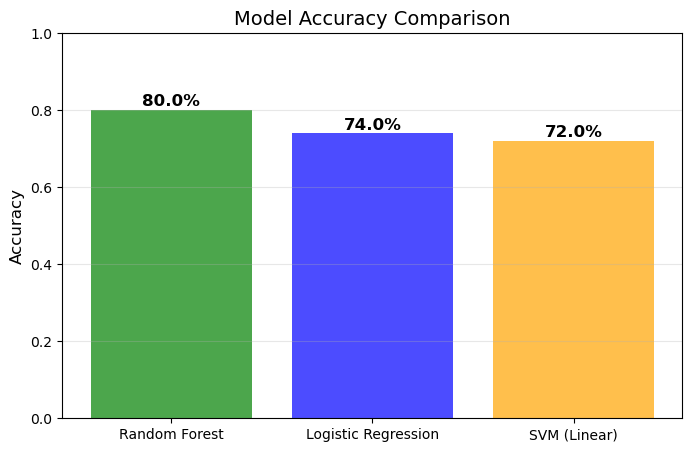

In [125]:
models = ['Random Forest', 'Logistic Regression', 'SVM (Linear)']
accuracy = [0.80, 0.74, 0.72]  # <-- Replace with your actual test accuracies

plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracy, color=['green', 'blue', 'orange'], alpha=0.7)

# Add percentage labels on top
for i, (bar, acc) in enumerate(zip(bars, accuracy)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.1%}', ha='center', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.show()

### Model Comparison Summary
The Random Forest Classifier is the best performing model for this dataset, achieving the highest accuracy and most balanced predictive power.

#### Key Performance Highlights:

* Top Performer: Random Forest achieved 80.0% accuracy.

* Baseline Models: Logistic Regression followed at 74.0%, while Linear SVM reached 72.0%.

* Weakest Performer: RBF SVM struggled significantly with an accuracy of only 65.62%.
